# EXO 1


Nous allons expérimenter quelques approches "traditionnelles" de la classification des textes. Ces approches sont antérieures à la révolution de l'apprentissage en profondeur dans le traitement du langage naturel, mais sont souvent des moyens rapides et efficaces de former un classificateur de texte.


Pour nos données, nous allons travailler avec l'ensemble de données 20 Newsgroups, une collection classique de documents texte qui est souvent utilisée comme référence pour les modèles de classification de texte. L'ensemble contient des textes sur divers sujets, allant de l'informatique à la religion. Certains sujets sont étroitement liés les uns aux autres (tels que « Matériel IBM PC » et « Matériel Mac »), tandis que d'autres sont très différents (tels que « religion » ou « hockey »). Les 20 Newsgroups sont livrés avec la bibliothèque d'apprentissage automatique Scikit-learn, notre principal outil pour cet exercice. Il a été divisé en un ensemble de formation de 11 314 textes et un ensemble de test de 7 532 textes.


Pour cette fois on vous laisse utiliser vos connaisances pour faire l'ensemble des traitements que vous jugerai nécessaire pour un bon classifieur. 

# Importation de bibliothèques

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.stem import WordNetLemmatizer
import re

# Importation du jeu de données

In [2]:
from sklearn.datasets import fetch_20newsgroups

In [3]:
data_train = fetch_20newsgroups(subset="train",shuffle=True, categories=None)

In [4]:
print(data_train.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [5]:
data_test = fetch_20newsgroups(subset="test", shuffle=True, categories=None)

In [6]:
type(data_test)

sklearn.utils.Bunch

In [7]:
print (data_train.target_names) 

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [8]:
print(len(data_train.data))

11314


In [9]:
print (data_test.target_names) 

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [10]:
print(len(data_test.data))

7532


# Train , Test Dataset

In [11]:
y_train , y_test = data_train.target, data_test.target

Vectorisation

In [15]:
vectorizer = TfidfVectorizer( sublinear_tf=True, max_df=0.5, min_df=5, stop_words="english")

In [16]:
X_train = vectorizer.fit_transform(data_train.data)

In [17]:
X_test = vectorizer.transform(data_test.data)

In [ ]:
#vectorizer.get_stop_words()

In [18]:
print('X_train : ',len(data_train.data),'documents')
print('X_test : ',len(data_test.data),'documents')
print('y_train : ' ,len(y_train),'documents')
print('y_test : ',len(y_test),'documents')

X_train :  11314 documents
X_test :  7532 documents
y_train :  11314 documents
y_test :  7532 documents


# Modele de classification

In [19]:
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train) 

RandomForestClassifier(random_state=0)

Prediction

In [20]:
y_pred = classifier.predict(X_test)

Precision

In [21]:
print(accuracy_score(y_test, y_pred))

0.7769516728624535


In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.63      0.69       319
           1       0.66      0.73      0.69       389
           2       0.71      0.81      0.75       394
           3       0.65      0.68      0.67       392
           4       0.77      0.77      0.77       385
           5       0.81      0.71      0.76       395
           6       0.79      0.87      0.83       390
           7       0.84      0.82      0.83       396
           8       0.88      0.89      0.89       398
           9       0.83      0.90      0.86       397
          10       0.90      0.91      0.91       399
          11       0.89      0.90      0.89       396
          12       0.65      0.56      0.60       393
          13       0.83      0.76      0.79       396
          14       0.83      0.91      0.86       394
          15       0.71      0.94      0.81       398
          16       0.66      0.87      0.75       364
          17       0.96    

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

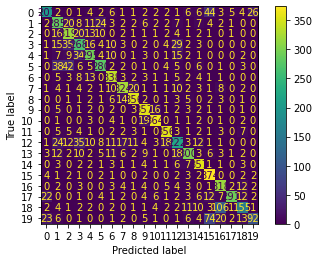

In [24]:
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

In [25]:
def benchmark(clf,nom):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"accuracy:   {score:.3}")
    return nom,score

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier

In [27]:
results = []
for clf, name in (
    (RandomForestClassifier(n_estimators=1000, random_state=0),"Random Forest"),
    (LogisticRegression(C=5, max_iter=1000), "Logistic Regression"),
    (RidgeClassifier(alpha=1.0, solver="sparse_cg"), "Ridge Classifier"),
    (KNeighborsClassifier(n_neighbors=100), "kNN"),
    (LinearSVC(C=0.1, dual=False, max_iter=1000), "Linear SVC"),
    (NearestCentroid(), "NearestCentroid"),
    (ComplementNB(alpha=0.1), "Complement naive Bayes"),
):
    print("=" * 80)
    print(name)
    results.append(benchmark(clf, name))

Random Forest
accuracy:   0.787
Logistic Regression
accuracy:   0.847
Ridge Classifier
accuracy:   0.856
kNN
accuracy:   0.765
Linear SVC
accuracy:   0.848
NearestCentroid
accuracy:   0.785
Complement naive Bayes
accuracy:   0.828
